<a href="https://colab.research.google.com/github/Bogula/KISS/blob/main/ZahlenerkennenMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zahlen erkennen / Detect numbers


> MNIST Data & Neuronal Network



In [1]:
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Libraries 
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential


from matplotlib import pyplot as plt
import keras_visualizer

In [3]:


# Importieren der Daten  / Import Data

(x_train, y_train), (x_test, y_test) = mnist.load_data()


#Kopieren der Originaldaten / Copy Original Data
x_train_drawing = x_train
x_test_drawing = x_test

#Umformen in 784 Punkte / Reshape 28 x 28 to 1 x 784

image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Klassen  / Output classes
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



11490434/11490434 [==============================] - 0s 0us/step




```
# Als Code formatiert
```

## Mal angucken? / Sneak Peak?

Die ersten 32 Zahlen / First 32 numbers





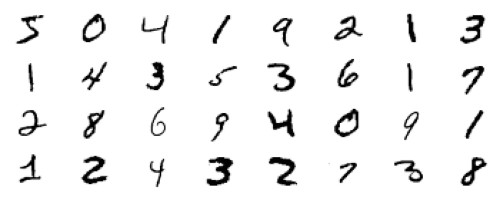

In [4]:
for i in range(32):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[i], cmap='Greys')

*Our mini network*## Unser Mininetzwerk

Simple 
Input -> HiddenLayer(32) -> Outputlayer(10)


In [5]:
model = Sequential()

# Input layer mit mit dem input_shape parameter angepasst werden
# the shape of our training data.

model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
#model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


## Train Network

Netzwerk Trainieren

In [7]:
from keras_visualizer import visualizer
visualizer(model, file_format='png',view=True)

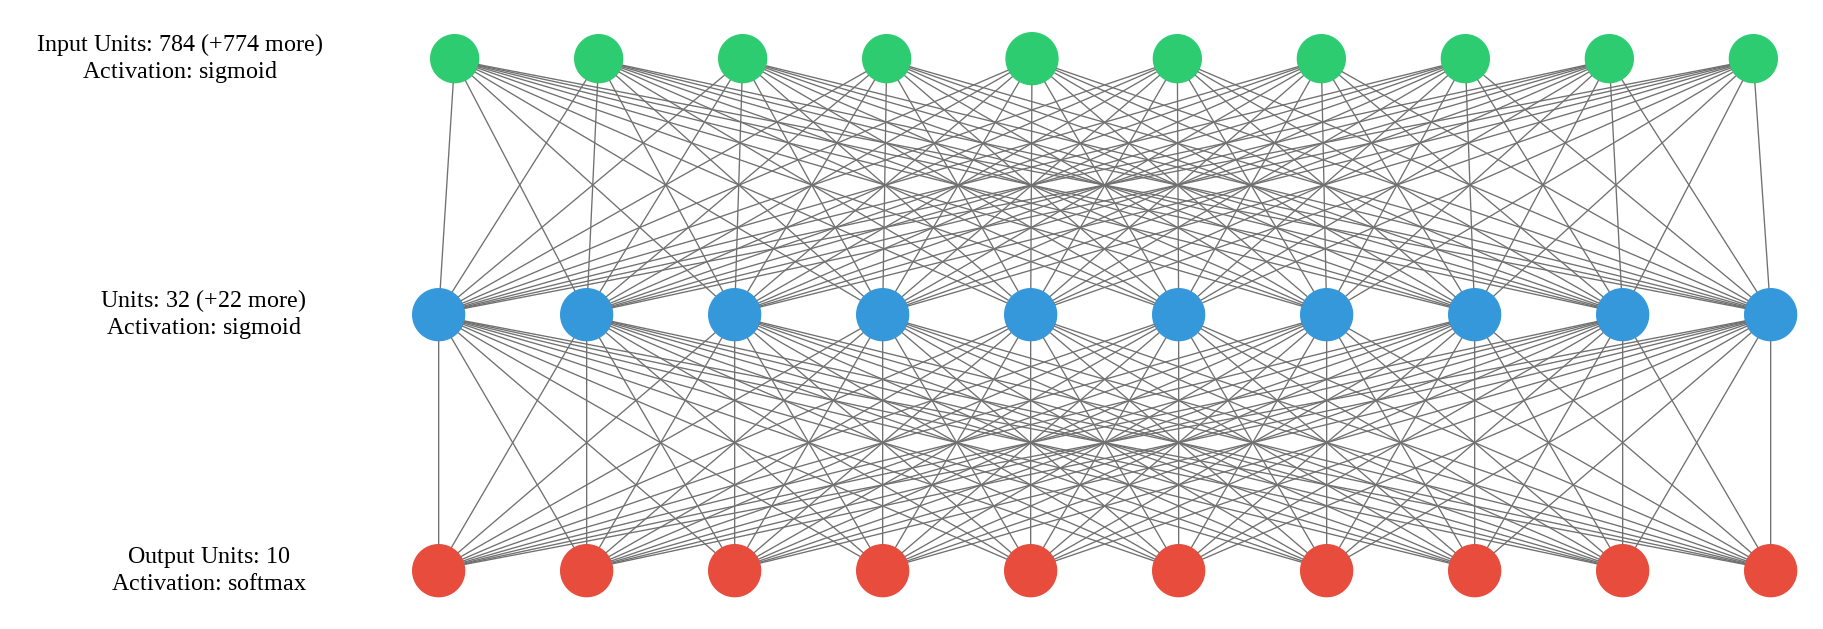

In [8]:
from IPython.display import Image
Image('graph.png')

In [ ]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=8, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.399
Test accuracy: 0.903


8


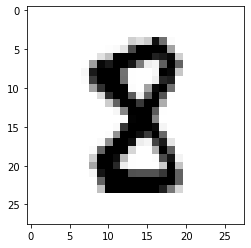

In [ ]:
ex = 179


plt.imshow(x_test_drawing[ex], cmap='Greys')

a= model.predict([x_test[ex:ex+1]])
print(a.argmax())